# Text Classification for Traffic Sentimental Analysis

In this assignment, you will extend the practice exercise to develop more machine learning based text classification models for traffic sentimental analysis and tune the model parameters to achieve the best performance. The machine learning based text classification models you may develop include logistic regression, KNN, RF, XGBoost, SVM, and Naïve Bayes models. 

In [31]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
import os
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score

In [24]:
data = pd.read_csv('Pakistani Traffic sentiment Analysis.csv')

In [17]:
data.head()

,Text,Sentiment
0,Adayala road is clear,0
1,Traffic jam from parbat rd to nazim-ud-din rd ...,1
2,Mandra is clear,0
3,Fort street is clear,0
4,"Mashriq Hotel towards Fawara Chowk, City Sadda...",1


In [20]:
# Vectorizer definition

vec1 = CountVectorizer(ngram_range=(1, 2), stop_words='english',min_df=20)
vec2 = HashingVectorizer(ngram_range=(1, 2), n_features=200)
vec3 = TfidfVectorizer(min_df=20,norm='l2',smooth_idf=True,use_idf=True,ngram_range=(1, 1),stop_words='english')


In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 1001)

#### Logistic Regression

{'C': 10, 'penalty': 'l2', 'solver': 'sag'}
The accuracy of the model is: 0.9549763033175356 CountVectorizer(min_df=20, ngram_range=(1, 2), stop_words='english')
{'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
The accuracy of the model is: 0.9502369668246445 HashingVectorizer(n_features=200, ngram_range=(1, 2))
{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
The accuracy of the model is: 0.9620853080568721 TfidfVectorizer(min_df=20, stop_words='english')


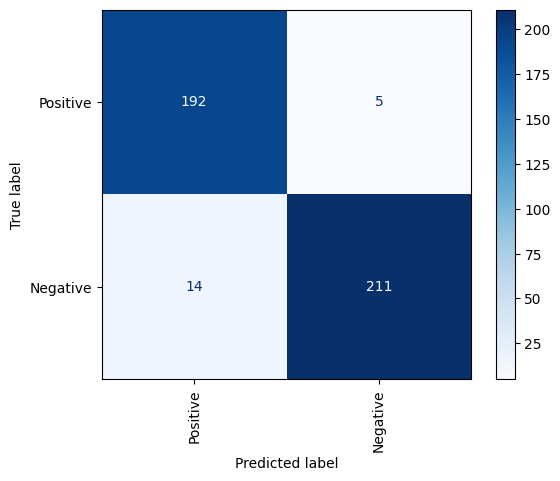

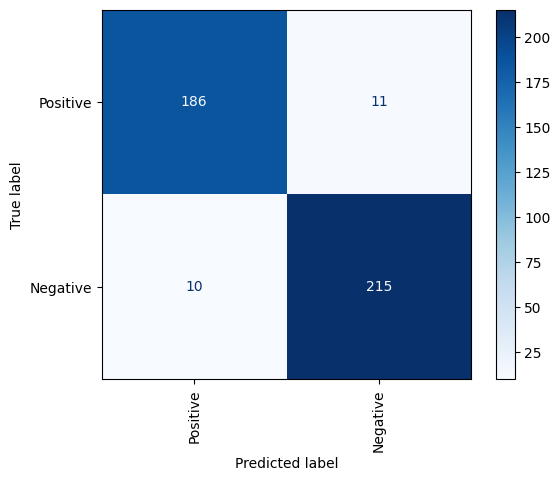

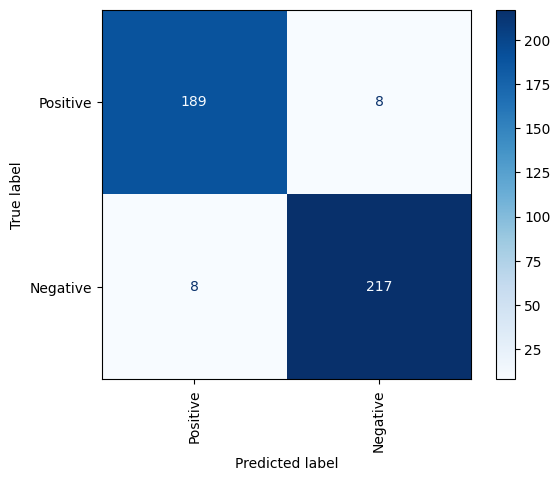

In [32]:
lr_data = data.copy()
lr_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l2'],  # Regularization type
    'solver': ['newton-cg','lbfgs','newton-cholesky','liblinear','sag']  # Algorithm to use for optimization
    }
for i in (vec1,vec2,vec3):
    x = i.fit_transform(lr_data['Text'])
    y = lr_data['Sentiment']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)
    
    model = LogisticRegression(max_iter=1000, random_state=0)
    
    
    lr_grid_search = GridSearchCV(estimator=model, param_grid=lr_params, scoring='accuracy', n_jobs=4, cv=skf.split(x_train,y_train), verbose=False )
    lr_grid_search.fit(x_train, y_train)

    best_params = lr_grid_search.best_params_
    print(best_params)
    best_score = lr_grid_search.best_score_

    lr_model = lr_grid_search.best_estimator_

    cmd.from_estimator(lr_model, x_test, y_test,display_labels=['Positive','Negative'],cmap='Blues', xticks_rotation='vertical')

    print('The accuracy of the model is: '+str(accuracy_score(y_test,lr_model.predict(x_test)))+' '+str(i))





#### KNN

{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}
The accuracy of the model is: 0.957345971563981 CountVectorizer(min_df=20, ngram_range=(1, 2), stop_words='english')
{'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'distance'}
The accuracy of the model is: 0.9478672985781991 HashingVectorizer(n_features=200, ngram_range=(1, 2))
{'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'distance'}
The accuracy of the model is: 0.9123222748815166 TfidfVectorizer(min_df=20, stop_words='english')


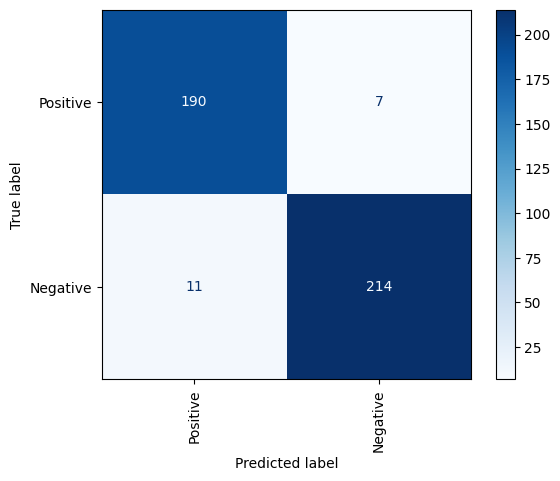

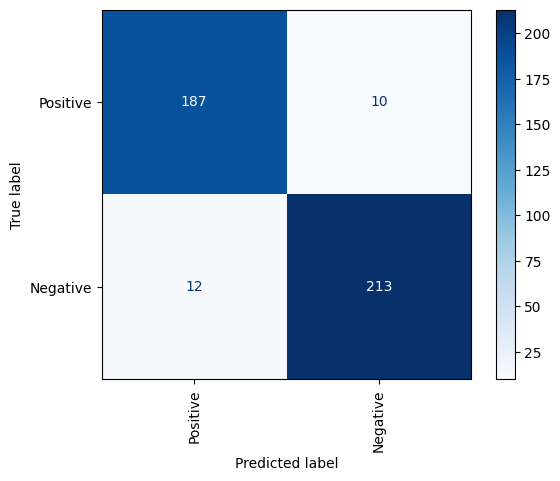

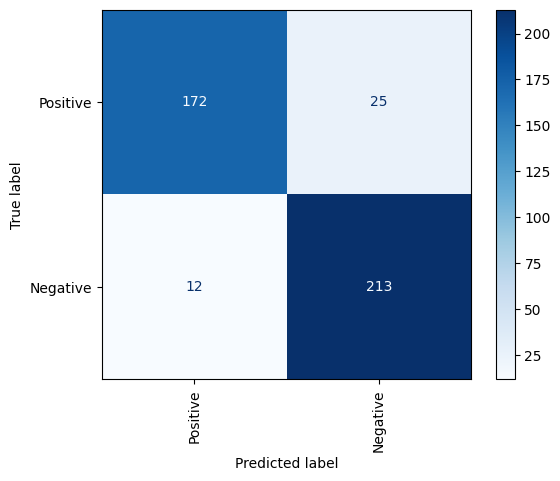

In [34]:
knn_data = data.copy()
knn_params = {
    'n_neighbors': [15,16,17],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting scheme for neighbors
    'metric': ['euclidean', 'manhattan']  # Distance metric
    }
    
for i in (vec1,vec2,vec3):
    
    x = i.fit_transform(knn_data['Text'])
    y = knn_data['Sentiment']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)
    
    model=KNeighborsClassifier()
    
    knn_grid_search = GridSearchCV(estimator=model, param_grid=knn_params, scoring='accuracy', n_jobs=4, cv=skf.split(x_train,y_train), verbose=False )
    knn_grid_search.fit(x_train, y_train)

    best_params = knn_grid_search.best_params_
    print(best_params)
    best_score = knn_grid_search.best_score_

    knn_model = knn_grid_search.best_estimator_

    cmd.from_estimator(knn_model, x_test, y_test,display_labels=['Positive','Negative'],cmap='Blues', xticks_rotation='vertical')

    print('The accuracy of the model is: '+str(accuracy_score(y_test,knn_model.predict(x_test)))+' '+str(i))

#### Random Forest

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
The accuracy of the model is: 0.9715639810426541 CountVectorizer(min_df=20, ngram_range=(1, 2), stop_words='english')
{'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
The accuracy of the model is: 0.976303317535545 HashingVectorizer(n_features=200, ngram_range=(1, 2))
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 1000}
The accuracy of the model is: 0.9739336492890995 TfidfVectorizer(min_df=20, stop_words='english')


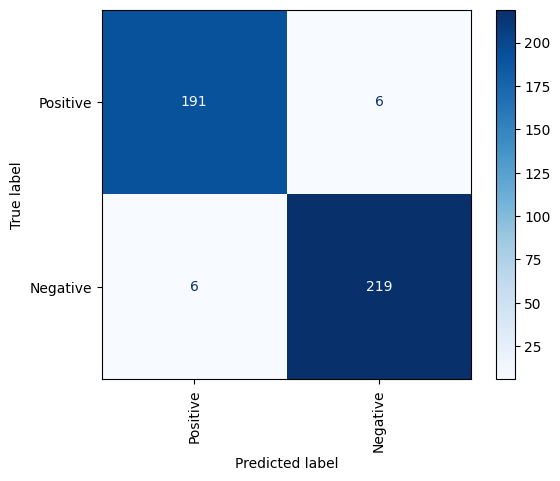

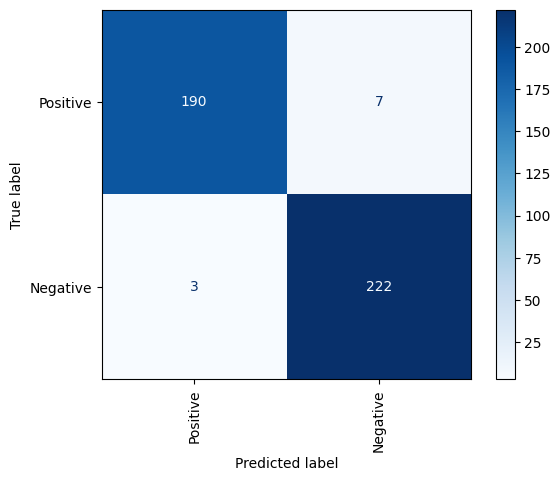

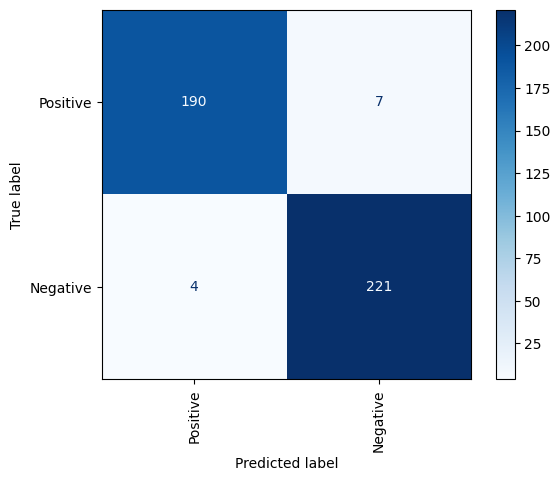

In [35]:
rf_data = data.copy()
rf_params = {
    'n_estimators': [50, 500, 1000],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
    }
    
for i in (vec1,vec2,vec3):
    
    x = i.fit_transform(rf_data['Text'])
    y = rf_data['Sentiment']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)
    
    model=RandomForestClassifier(random_state=0)
    
    rf_grid_search = GridSearchCV(estimator=model, param_grid=rf_params, scoring='accuracy', n_jobs=4, cv=skf.split(x_train,y_train), verbose=False )
    rf_grid_search.fit(x_train,y_train)

    best_params = rf_grid_search.best_params_
    print(best_params)
    best_score = rf_grid_search.best_score_

    rf_model = rf_grid_search.best_estimator_

    cmd.from_estimator(rf_model, x_test, y_test,display_labels=['Positive','Negative'],cmap='Blues', xticks_rotation='vertical')

    print('The accuracy of the model is: '+str(accuracy_score(y_test,rf_model.predict(x_test)))+' '+str(i))

#### XGBoost

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
The accuracy of the model is: 0.9620853080568721 CountVectorizer(min_df=20, ngram_range=(1, 2), stop_words='english')
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
The accuracy of the model is: 0.9715639810426541 HashingVectorizer(n_features=200, ngram_range=(1, 2))
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
The accuracy of the model is: 0.9739336492890995 TfidfVectorizer(min_df=20, stop_words='english')


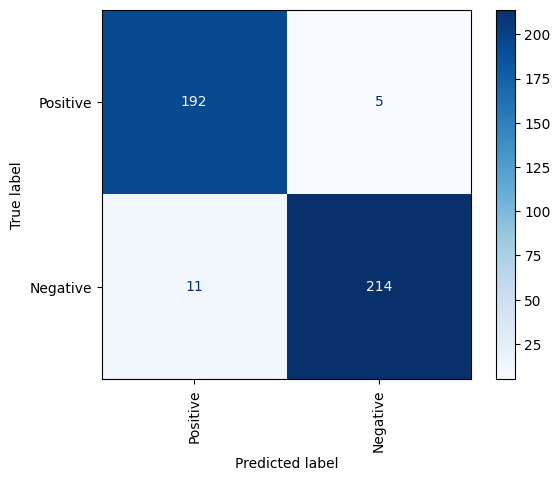

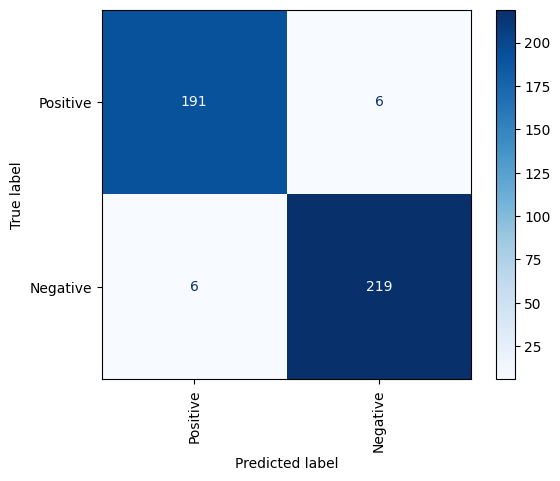

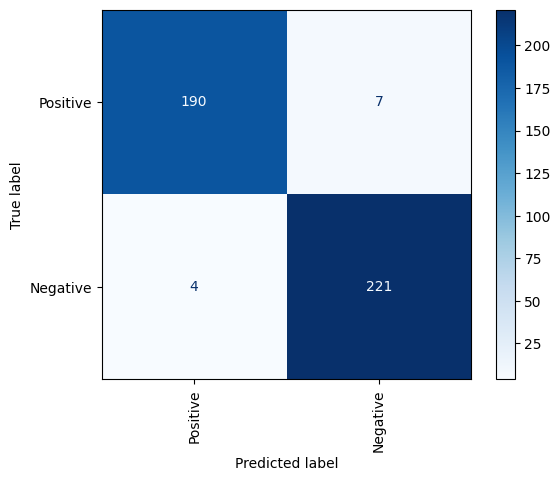

In [43]:
xgb_data = data.copy()
xgb_params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5]
}
    
for i in (vec1,vec2,vec3):
    
    x = i.fit_transform(xgb_data['Text'])
    y = xgb_data['Sentiment']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)
    
    map = {'air': 0, 'bus': 1, 'car': 2,'rail':3}
    xgb_y_train = y_train.map(map)
    xgb_y_test = y_test.map(map)
    model=XGBClassifier()
    
    xgb_grid_search = GridSearchCV(estimator=model, param_grid=xgb_params, scoring='accuracy', n_jobs=4, cv=skf.split(x_train,y_train), verbose=False )
    xgb_grid_search.fit(x_train,y_train)

    best_params = xgb_grid_search.best_params_
    print(best_params)
    best_score = xgb_grid_search.best_score_

    xgb_model = xgb_grid_search.best_estimator_

    cmd.from_estimator(xgb_model, x_test, y_test,display_labels=['Positive','Negative'],cmap='Blues', xticks_rotation='vertical')

    print('The accuracy of the model is: '+str(accuracy_score(y_test,xgb_model.predict(x_test)))+' '+str(i))

#### Support Vector Machine

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
The accuracy of the model is: 0.9597156398104265 CountVectorizer(min_df=20, ngram_range=(1, 2), stop_words='english')
{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
The accuracy of the model is: 0.9691943127962085 HashingVectorizer(n_features=200, ngram_range=(1, 2))
{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
The accuracy of the model is: 0.9691943127962085 TfidfVectorizer(min_df=20, stop_words='english')


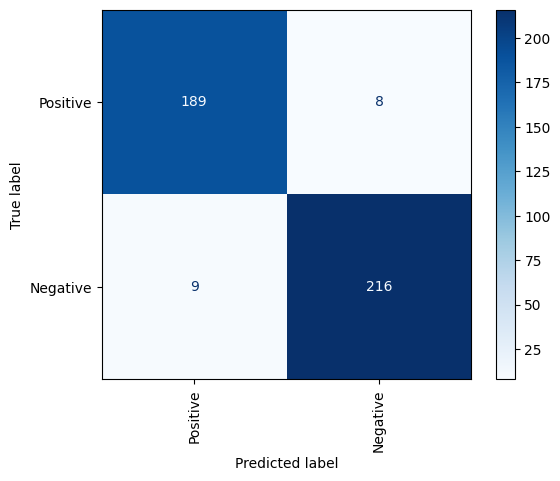

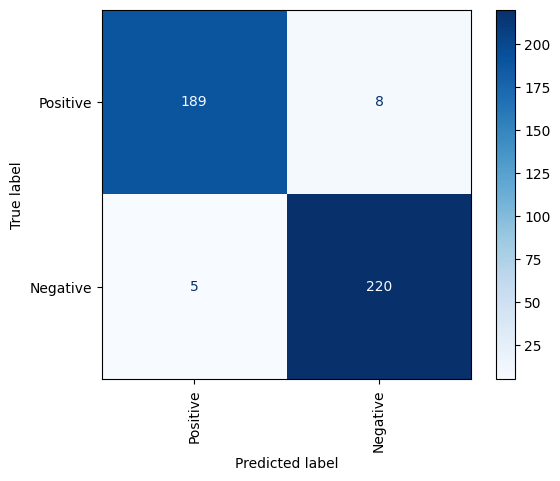

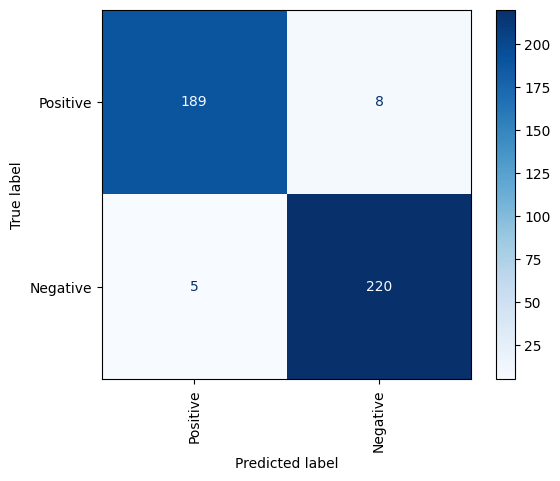

In [41]:
svm_data = data.copy()
svm_params = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel function
    'gamma': ['scale', 'auto', 0.1, 1]  # Kernel coefficient
    }
for i in (vec1,vec2,vec3):
    
    x = i.fit_transform(svm_data['Text'])
    y = svm_data['Sentiment']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)
    
    model=SVC()
    
    svm_grid_search = GridSearchCV(estimator=model, param_grid=svm_params, scoring='accuracy', n_jobs=4, cv=skf.split(x_train,y_train), verbose=False )
    svm_grid_search.fit(x_train,y_train)

    best_params = svm_grid_search.best_params_
    print(best_params)
    best_score = svm_grid_search.best_score_

    svm_model = svm_grid_search.best_estimator_

    cmd.from_estimator(svm_model, x_test, y_test,display_labels=['Positive','Negative'],cmap='Blues', xticks_rotation='vertical')

    print('The accuracy of the model is: '+str(accuracy_score(y_test,svm_model.predict(x_test)))+' '+str(i))

#### Naive Bayes

{'alpha': 0.1, 'force_alpha': True}
The accuracy of the model is: 0.957345971563981 CountVectorizer(min_df=20, ngram_range=(1, 2), stop_words='english')
{'alpha': 1, 'force_alpha': True}
The accuracy of the model is: 0.8199052132701422 HashingVectorizer(n_features=200, ngram_range=(1, 2))
{'alpha': 1, 'force_alpha': True}
The accuracy of the model is: 0.9597156398104265 TfidfVectorizer(min_df=20, stop_words='english')


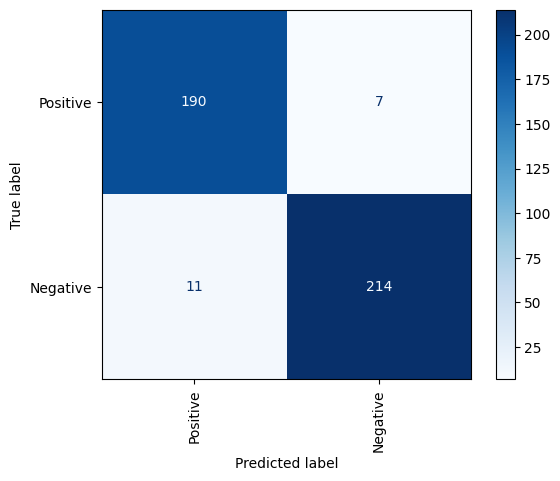

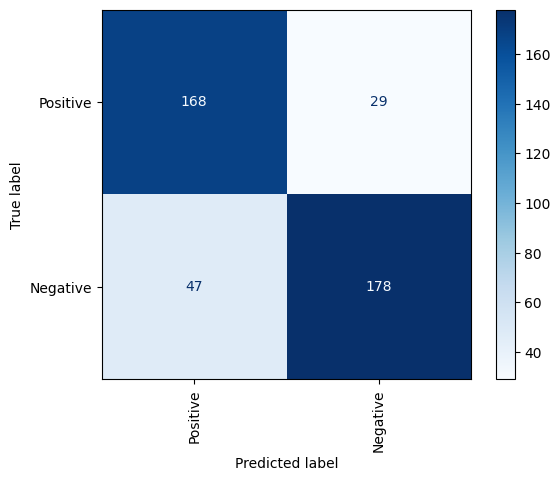

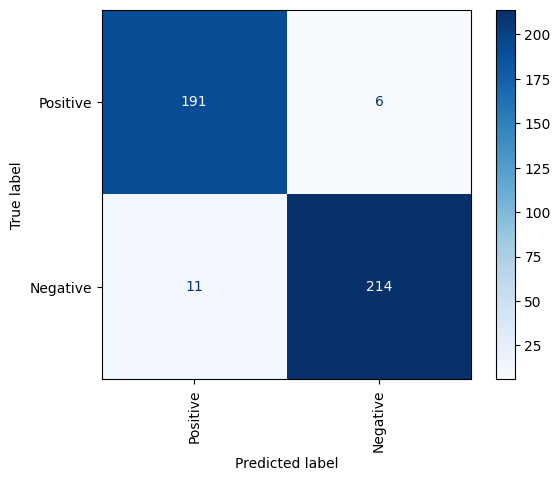

In [42]:
nb_data = data.copy()
nb_params = {'alpha': [0.1, 0.5, 1],'force_alpha': [True,False]}
for i in (vec1,vec2,vec3):
    
    x = i.fit_transform(nb_data['Text'])
    y = nb_data['Sentiment']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)
    
    model=BernoulliNB()
    
    nb_grid_search = GridSearchCV(estimator=model, param_grid=nb_params, scoring='accuracy', n_jobs=4, cv=skf.split(x_train,y_train), verbose=False )
    nb_grid_search.fit(x_train,y_train)

    best_params = nb_grid_search.best_params_
    print(best_params)
    best_score = nb_grid_search.best_score_

    nb_model = nb_grid_search.best_estimator_

    cmd.from_estimator(nb_model, x_test, y_test,display_labels=['Positive','Negative'],cmap='Blues', xticks_rotation='vertical')

    print('The accuracy of the model is: '+str(accuracy_score(y_test,nb_model.predict(x_test)))+' '+str(i))

### The Best Model

##### Random Forest with Hashing Vectorizer

{'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
The accuracy of the model is: 0.976303317535545 ; Hashing Vectorizer


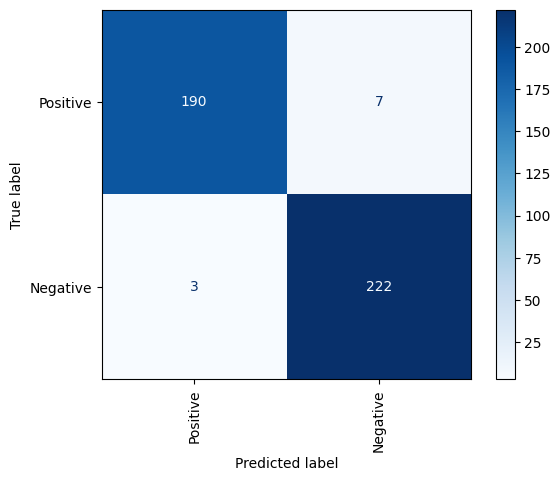

In [46]:
rf_data = data.copy()
rf_params = {
    'n_estimators': [50, 500, 1000],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
    }

x = vec2.fit_transform(rf_data['Text'])
y = rf_data['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)
    
model=RandomForestClassifier(random_state=0)
    
rf_grid_search = GridSearchCV(estimator=model, param_grid=rf_params, scoring='accuracy', n_jobs=4, cv=skf.split(x_train,y_train), verbose=False )
rf_grid_search.fit(x_train,y_train)

best_params = rf_grid_search.best_params_
print(best_params)
best_score = rf_grid_search.best_score_
rf_model = rf_grid_search.best_estimator_
cmd.from_estimator(rf_model, x_test, y_test,display_labels=['Positive','Negative'],cmap='Blues', xticks_rotation='vertical')
print('The accuracy of the model is: '+str(accuracy_score(y_test,rf_model.predict(x_test)))+' ; Hashing Vectorizer')

In [47]:
review = 'Mandra is clear'

score=rf_model.predict_proba(vec2.transform([review]))[0][1]

if score <=0.5:
  attitude='positive'
else:
  attitude='negative'

print('The sentiment of this review is: '+ attitude)

The sentiment of this review is: positive


In [77]:
review2 = 'Traffic jam from lehtrar road to faisal ave'

score2=rf_model.predict_proba(vec2.transform([review2]))[0][1]

if score2 <=0.5:
  attitude2='positive'
else:
  attitude2='negative'

print('The sentiment of this review is: '+ attitude2)

The sentiment of this review is: negative


| Model | Count Vectorizer | Hashing Vectorizer | TF-IDF Vectorizer|
| --- | --- | --- |--- |
| Logistic Regression | 0.9550 | 0.9502 |0.9621 |
| kNN | 0.9573 |  0.9479 |0.9123 |
| Random Forest | 0.9716 | **0.9763** | 0.9739 |
| XGBoost Classifier | 0.9621 |0.9716 |0.9739 |
| Support Vector Machine |0.9597 |0.9692 | 0.9692 |
| Naive Bayes | 0.9573 | 0.8199 |0.9597 |